In [1]:
from math import pi as π
import numpy as np

from scipy.linalg import fractional_matrix_power, eig, inv

# Python control toolbox: https://python-control.readthedocs.io/
from control import ss, gram, balred, use_numpy_matrix
use_numpy_matrix(False)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
A = np.array([
    [-0.75,    1],
    [-0.3, -0.75]
])
B = np.array([[2, 1]]).T
C = np.array([[1, 2]])
D = 0

sys = ss(A, B, C, D)

# Controllability Gramian
Wc = gram(sys, 'c')

# Observability Gramian
Wo = gram(sys, 'o')

# Balance the system
sysb = balred(sys, len(B))

# Gramians of balanced system
Wc_balanced = gram(sysb, 'c')
Wo_balanced = gram(sysb, 'o')

with np.printoptions(precision=4, suppress=True):
    print(f'Balanced Wc:\n{Wc_balanced}')
    print(f'Balanced Wo:\n{Wo_balanced}')

Balanced Wc:
[[ 1.9439 -0.    ]
 [-0.      0.3207]]
Balanced Wo:
[[1.9439 0.    ]
 [0.     0.3207]]


In [3]:
# Manually compute transform matrix for balanced Gramians

# Tu are unscaled eigenvectors
_, Tu = eig(Wc @ Wo)

# Resolve sign ambiguity of eigenvectors
Tu = np.sign(Tu[0]) * Tu

Σ_c = inv(Tu) @ Wc @ inv(Tu).T
Σ_o = Tu.T @ Wo @ Tu
Σ_s = fractional_matrix_power(Σ_c, 1/4) @ fractional_matrix_power(Σ_o, -1/4)

T = Tu @ Σ_s

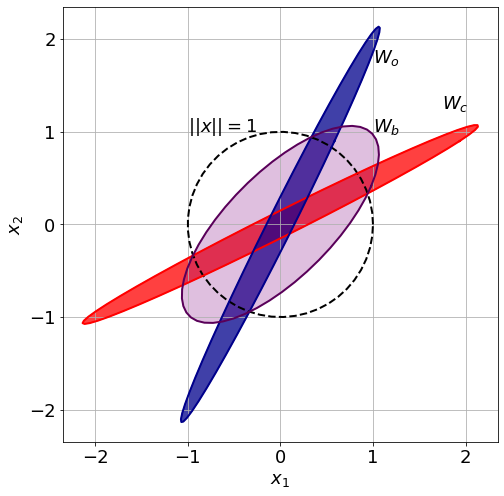

In [4]:
# Figure 9.2

# Plot Gramians
θ = np.linspace(0, 2*π)
circle = np.row_stack((np.cos(θ), np.sin(θ)))

# Off-diagonals should be within machine precision of 0, but
# in case that machine error is negative we manually threshold them
Wc_balanced[Wc_balanced < 0] = 0
Wo_balanced[Wo_balanced < 0] = 0

ellipse_c = np.sqrt(Wc) @ circle
ellipse_o = np.sqrt(Wo) @ circle
ellipse_b = (inv(T) @ np.sqrt(Wc_balanced) @ T) @ circle

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)

ax.plot(*circle, '--', color='black', linewidth=2)
ax.text(-1, 1, r'$||x|| = 1$')

# Controllability Gramian (unbalanced)
ax.plot(*ellipse_c, color='red', linewidth=2)
ax.fill(*ellipse_c, color='red', alpha=0.75)
ax.text(1.75, 1.25, r'$W_c$')

# Observability Gramian (unbalanced)
ax.plot(*ellipse_o, color='darkblue', linewidth=2)
ax.fill(*ellipse_o, color='darkblue', alpha=0.75)
ax.text(1, 1.75, r'$W_o$')

# Balanced Gramians
ax.plot(*ellipse_b, color=(0.35, 0, 0.35), linewidth=2)
ax.fill(*ellipse_b, color=(0.5, 0, 0.5), alpha=0.25)
ax.text(1, 1, r'$W_b$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(True);